In [1]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # import cv2

In [7]:
import os


In [13]:
print(os.listdir("/content/drive/My Drive/July 20th 06/Pneumonia Prediction Using X-RAY Images/Dataset"))

['Trainset', 'Testset', 'val']


In [15]:
DIR = os.listdir('/content/drive/My Drive/July 20th 06/Pneumonia Prediction Using X-RAY Images/Dataset')
print(DIR)

['Trainset', 'Testset', 'val']


In [16]:
train_folder = '/content/drive/My Drive/July 20th 06/Pneumonia Prediction Using X-RAY Images/Dataset/Trainset'
test_folder = '/content/drive/My Drive/July 20th 06/Pneumonia Prediction Using X-RAY Images/Dataset/Testset'
val_folder = '/content/drive/My Drive/July 20th 06/Pneumonia Prediction Using X-RAY Images/Dataset/val'

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

In [18]:
import pandas.util.testing as tm

# ***Data Preprocessing***

In [20]:
#######################################Data Preprocessing############################################################

labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
IMG_SIZE = 50 # resize image

def get_data_train(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [27]:
train = get_data_train(train_folder)

In [28]:
test = get_data_train(test_folder)

In [25]:
val = get_data_train(val_folder)

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



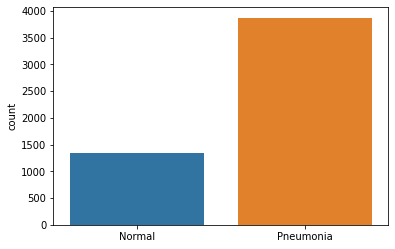

In [29]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Normal")
    else:
        l.append("Pneumonia")
        
sns.countplot(l)

In [32]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    y_val.append(label)

In [33]:
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255

In [34]:
X_test.shape

(624, 50, 50)

In [35]:
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)

# **Model Building**

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential

In [37]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation="relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), shuffle=True)
scores = model.evaluate(X_test, y_test)

model.save("cnn.model")

Epoch 1/25
163/163 [==============================] - 28s 169ms/step - loss: 0.4300 - accuracy: 0.8092 - val_loss: 0.7607 - val_accuracy: 0.7812
Epoch 2/25
163/163 [==============================] - 27s 168ms/step - loss: 0.1570 - accuracy: 0.9400 - val_loss: 0.4418 - val_accuracy: 0.8125
Epoch 3/25
163/163 [==============================] - 27s 168ms/step - loss: 0.1268 - accuracy: 0.9534 - val_loss: 0.3486 - val_accuracy: 0.8750
Epoch 4/25
163/163 [==============================] - 28s 169ms/step - loss: 0.1213 - accuracy: 0.9530 - val_loss: 0.2394 - val_accuracy: 0.9062
Epoch 5/25
163/163 [==============================] - 27s 168ms/step - loss: 0.0968 - accuracy: 0.9663 - val_loss: 0.2378 - val_accuracy: 0.8750
Epoch 6/25
163/163 [==============================] - 27s 167ms/step - loss: 0.0816 - accuracy: 0.9714 - val_loss: 0.2499 - val_accuracy: 0.9062
Epoch 7/25
163/163 [==============================] - 27s 168ms/step - loss: 0.0698 - accuracy: 0.9743 - val_loss: 0.3326 - val_ac

In [38]:
# scores
print("Test loss {}".format(scores[0]))
print("Test accuracy {}".format(scores[1]))

Test loss 1.6041066646575928
Test accuracy 0.7788461446762085


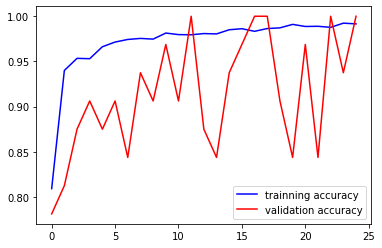

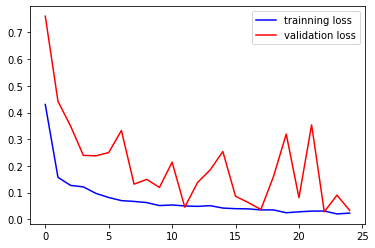

In [39]:
# visualization

import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [40]:
# predict classes

prediction = model.predict_classes(X_test)
prediction = prediction.reshape(1, -1)[0]
prediction[:15]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int32)

In [41]:
# correct and incorrect
# check tensorflow website

correct = np.nonzero(prediction == y_test)[0]
incorrect = np.nonzero(prediction != y_test)[0]

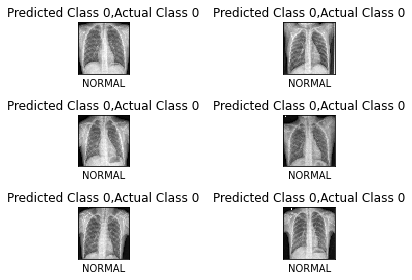

In [42]:
j = 0
for i in correct[:6]:
    plt.subplot(3,2,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(50,50), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(prediction[i], y_test[i]))
    plt.xlabel(labels[prediction[i]])
    plt.tight_layout()
    j += 1

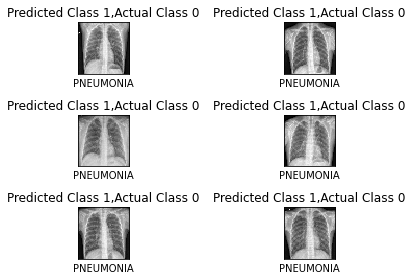

In [43]:
j = 0
for i in incorrect[:6]:
    plt.subplot(3,2,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(50,50), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(prediction[i], y_test[i]))
    plt.xlabel(labels[prediction[i]])
    plt.tight_layout()
    j += 1

In [44]:
# load model and predict some some external photo

labels = ["NORMAL", "PNEUMONIA"]
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("cnn.model") # load model

In [45]:
# extra pneumonia photo from google
prediction = model.predict([prepare("/content/drive/My Drive/July 20th 06/Pneumonia Prediction Using X-RAY Images/Dataset/val/PNEUMONIA/Copy of person1946_bacteria_4875 (1).jpeg")])
print(labels[int(prediction[0])])

PNEUMONIA


In [46]:
# extra normal x-ray photo from google
prediction = model.predict([prepare("/content/drive/My Drive/July 20th 06/Pneumonia Prediction Using X-RAY Images/Dataset/val/NORMAL/NORMAL2-IM-1436-0001.jpeg")])
print(labels[int(prediction[0])])

NORMAL


In [47]:
# extra normal x-ray photo from google
prediction = model.predict([prepare("/content/drive/My Drive/July 20th 06/Pneumonia Prediction Using X-RAY Images/Dataset/val/NORMAL/NORMAL2-IM-1427-0001.jpeg")])
print(labels[int(prediction[0])])

NORMAL


In [49]:
prediction = model.predict([prepare("/content/drive/My Drive/July 20th 06/Pneumonia Prediction Using X-RAY Images/Dataset/val/PNEUMONIA/Copy of person1951_bacteria_4882.jpeg")])
print(labels[int(prediction[0])])

PNEUMONIA


In [50]:
prediction = model.predict([prepare("/content/drive/My Drive/July 20th 06/Pneumonia Prediction Using X-RAY Images/Dataset/val/PNEUMONIA/person1946_bacteria_4875.jpeg")])
print(labels[int(prediction[0])])

PNEUMONIA
